In [134]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as s
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [135]:
data=pd.read_excel("C:/Users/HP/Desktop/Data Science Projects-Anusha/Dummy Data HSS1.xlsx")
data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [258]:
#handle missing values
data['TV']=data['TV'].replace(np.NaN,data['TV'].mean,inplace=True)

In [138]:
#Create dummy values for column 'Influencer' since it has categorical data
infl_dummy=pd.get_dummies(data['Influencer'])
infl_dummy

,Macro,Mega,Micro,Nano
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
4567,0,0,1,0
4568,0,0,0,1
4569,0,0,1,0
4570,1,0,0,0


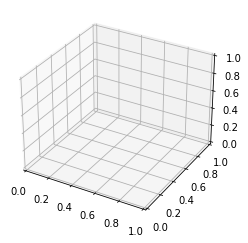

In [142]:
#3D Data Visualization
fig= plt.figure()
ax= fig.add_subplot(projection='3d')

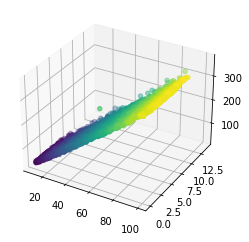

In [143]:
x=data['TV']
y=data['Social Media']
z=data['Sales']
fig=plt.figure()
ax= fig.add_subplot(projection='3d')
ax.scatter(x,y,z,c=np.linalg.norm([x,y,z],axis=0))

In [144]:
step_1=pd.concat([data,infl_dummy],axis=1)
step_1
step_1.drop(['Influencer','Mega','Micro','Nano'],inplace=True,axis=1)
step_1

,TV,Radio,Social Media,Sales,Macro
0,16.0,6.566231,2.907983,54.732757,0
1,13.0,9.237765,2.409567,46.677897,0
2,41.0,15.886446,2.913410,150.177829,0
3,83.0,30.020028,6.922304,298.246340,0
4,15.0,8.437408,1.405998,56.594181,0
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0
4568,71.0,20.610685,6.545573,249.101915,0
4569,44.0,19.800072,5.096192,163.631457,0
4570,71.0,17.534640,1.940873,253.610411,1


In [147]:
#Normalize the data
scaler= MinMaxScaler()

In [148]:
normdata=pd.DataFrame(scaler.fit_transform(step_1),columns=step_1.columns,index=step_1.index)
print(normdata)

            TV     Radio  Social Media     Sales  Macro
0     0.066667  0.134346      0.207984  0.070696    0.0
1     0.033333  0.189011      0.172336  0.046499    0.0
2     0.344444  0.325058      0.208372  0.357421    0.0
3     0.811111  0.614263      0.495098  0.802231    0.0
4     0.055556  0.172634      0.100558  0.076288    0.0
...        ...       ...           ...       ...    ...
4567  0.177778  0.091501      0.051286  0.190719    0.0
4568  0.677778  0.421727      0.468153  0.654597    0.0
4569  0.377778  0.405140      0.364490  0.397837    0.0
4570  0.677778  0.358784      0.138814  0.668141    1.0
4571  0.355556  0.326700      0.360939  0.351487    0.0

[4572 rows x 5 columns]


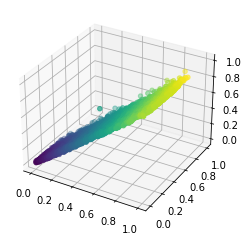

In [149]:
#Plot the normalized data
x=normdata['TV']
y=normdata['Social Media']
z=normdata['Sales']
fig=plt.figure()
ax= fig.add_subplot(projection='3d')
ax.scatter(x,y,z,c=np.linalg.norm([x,y,z],axis=0))

In [150]:
#Model with Influencer=Macro
normdata.rename(columns={'Social Media':'Social_Media'},inplace=True)
normdata

,TV,Radio,Social_Media,Sales,Macro
0,0.066667,0.134346,0.207984,0.070696,0.0
1,0.033333,0.189011,0.172336,0.046499,0.0
2,0.344444,0.325058,0.208372,0.357421,0.0
3,0.811111,0.614263,0.495098,0.802231,0.0
4,0.055556,0.172634,0.100558,0.076288,0.0
...,...,...,...,...,...
4567,0.177778,0.091501,0.051286,0.190719,0.0
4568,0.677778,0.421727,0.468153,0.654597,0.0
4569,0.377778,0.405140,0.364490,0.397837,0.0
4570,0.677778,0.358784,0.138814,0.668141,1.0


In [151]:
model1= ols('Sales ~ TV+Radio+Social_Media+Macro',data=normdata).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.578e+05
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:19:07   Log-Likelihood:                 14667.
No. Observations:                4547   AIC:                        -2.932e+04
Df Residuals:                    4542   BIC:                        -2.929e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0129      0.000     40.297      0.000       0.012       0.014
TV               0.9629      0.001    967.799      0.000       0.961       0.965
Radio         2.651e-05      0.002      0.017      0.986      -0.003       0.003
Social_Media -1.142e-05      0.001     -0.010      0.992      -0.002       0.002
Macro         4.724e-05      0.000      0.142      0.887      -0.001       0.001
==============================================================================
Omnibus:                     4456.671   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2035100.569
Skew:                           3.955   Prob(JB):                         0.00
Kurtosis:                     106.340   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
step_2=pd.concat([data,infl_dummy],axis=1)
step_2
step_2.drop(['Influencer','Macro','Micro','Nano'],inplace=True,axis=1)
step_2

,TV,Radio,Social Media,Sales,Mega
0,16.0,6.566231,2.907983,54.732757,1
1,13.0,9.237765,2.409567,46.677897,1
2,41.0,15.886446,2.913410,150.177829,1
3,83.0,30.020028,6.922304,298.246340,1
4,15.0,8.437408,1.405998,56.594181,0
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0
4568,71.0,20.610685,6.545573,249.101915,0
4569,44.0,19.800072,5.096192,163.631457,0
4570,71.0,17.534640,1.940873,253.610411,0


In [153]:
normdata2=pd.DataFrame(scaler.fit_transform(step_2),columns=step_2.columns,index=step_2.index)
print(normdata2)

            TV     Radio  Social Media     Sales  Mega
0     0.066667  0.134346      0.207984  0.070696   1.0
1     0.033333  0.189011      0.172336  0.046499   1.0
2     0.344444  0.325058      0.208372  0.357421   1.0
3     0.811111  0.614263      0.495098  0.802231   1.0
4     0.055556  0.172634      0.100558  0.076288   0.0
...        ...       ...           ...       ...   ...
4567  0.177778  0.091501      0.051286  0.190719   0.0
4568  0.677778  0.421727      0.468153  0.654597   0.0
4569  0.377778  0.405140      0.364490  0.397837   0.0
4570  0.677778  0.358784      0.138814  0.668141   0.0
4571  0.355556  0.326700      0.360939  0.351487   0.0

[4572 rows x 5 columns]


In [154]:
#Model with Influencer=Mega
normdata2.rename(columns={'Social Media':'Social_Media'},inplace=True)
normdata2

,TV,Radio,Social_Media,Sales,Mega
0,0.066667,0.134346,0.207984,0.070696,1.0
1,0.033333,0.189011,0.172336,0.046499,1.0
2,0.344444,0.325058,0.208372,0.357421,1.0
3,0.811111,0.614263,0.495098,0.802231,1.0
4,0.055556,0.172634,0.100558,0.076288,0.0
...,...,...,...,...,...
4567,0.177778,0.091501,0.051286,0.190719,0.0
4568,0.677778,0.421727,0.468153,0.654597,0.0
4569,0.377778,0.405140,0.364490,0.397837,0.0
4570,0.677778,0.358784,0.138814,0.668141,0.0


In [155]:
model2= ols('Sales ~ TV+Radio+Social_Media+Mega',data=normdata2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.581e+05
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:19:10   Log-Likelihood:                 14667.
No. Observations:                4547   AIC:                        -2.932e+04
Df Residuals:                    4542   BIC:                        -2.929e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0128      0.000     39.815      0.000       0.012       0.013
TV               0.9629      0.001    968.103      0.000       0.961       0.965
Radio         2.004e-05      0.002      0.013      0.990      -0.003       0.003
Social_Media -3.748e-05      0.001     -0.033      0.974      -0.002       0.002
Mega             0.0004      0.000      1.177      0.239      -0.000       0.001
==============================================================================
Omnibus:                     4448.728   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2018249.600
Skew:                           3.944   Prob(JB):                         0.00
Kurtosis:                     105.910   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
step_3=pd.concat([data,infl_dummy],axis=1)
step_3
step_3.drop(['Influencer','Macro','Mega','Nano'],inplace=True,axis=1)
step_3

,TV,Radio,Social Media,Sales,Micro
0,16.0,6.566231,2.907983,54.732757,0
1,13.0,9.237765,2.409567,46.677897,0
2,41.0,15.886446,2.913410,150.177829,0
3,83.0,30.020028,6.922304,298.246340,0
4,15.0,8.437408,1.405998,56.594181,1
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,1
4568,71.0,20.610685,6.545573,249.101915,0
4569,44.0,19.800072,5.096192,163.631457,1
4570,71.0,17.534640,1.940873,253.610411,0


In [157]:
#Model with Influencer=Micro
normdata3=pd.DataFrame(scaler.fit_transform(step_3),columns=step_3.columns,index=step_3.index)
print(normdata3)

            TV     Radio  Social Media     Sales  Micro
0     0.066667  0.134346      0.207984  0.070696    0.0
1     0.033333  0.189011      0.172336  0.046499    0.0
2     0.344444  0.325058      0.208372  0.357421    0.0
3     0.811111  0.614263      0.495098  0.802231    0.0
4     0.055556  0.172634      0.100558  0.076288    1.0
...        ...       ...           ...       ...    ...
4567  0.177778  0.091501      0.051286  0.190719    1.0
4568  0.677778  0.421727      0.468153  0.654597    0.0
4569  0.377778  0.405140      0.364490  0.397837    1.0
4570  0.677778  0.358784      0.138814  0.668141    0.0
4571  0.355556  0.326700      0.360939  0.351487    1.0

[4572 rows x 5 columns]


In [158]:
normdata3.rename(columns={'Social Media':'Social_Media'},inplace=True)
normdata3

,TV,Radio,Social_Media,Sales,Micro
0,0.066667,0.134346,0.207984,0.070696,0.0
1,0.033333,0.189011,0.172336,0.046499,0.0
2,0.344444,0.325058,0.208372,0.357421,0.0
3,0.811111,0.614263,0.495098,0.802231,0.0
4,0.055556,0.172634,0.100558,0.076288,1.0
...,...,...,...,...,...
4567,0.177778,0.091501,0.051286,0.190719,1.0
4568,0.677778,0.421727,0.468153,0.654597,0.0
4569,0.377778,0.405140,0.364490,0.397837,1.0
4570,0.677778,0.358784,0.138814,0.668141,0.0


In [159]:
model3= ols('Sales ~ TV+Radio+Social_Media+Micro',data=normdata3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.579e+05
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:19:15   Log-Likelihood:                 14667.
No. Observations:                4547   AIC:                        -2.932e+04
Df Residuals:                    4542   BIC:                        -2.929e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0130      0.000     40.264      0.000       0.012       0.014
TV               0.9629      0.001    967.969      0.000       0.961       0.965
Radio         4.035e-05      0.002      0.026      0.979      -0.003       0.003
Social_Media -2.246e-05      0.001     -0.020      0.984      -0.002       0.002
Micro           -0.0002      0.000     -0.565      0.572      -0.001       0.000
==============================================================================
Omnibus:                     4455.066   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2031775.704
Skew:                           3.953   Prob(JB):                         0.00
Kurtosis:                     106.255   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
step_4=pd.concat([data,infl_dummy],axis=1)
step_4
step_4.drop(['Influencer','Macro','Mega','Micro'],inplace=True,axis=1)
step_4

,TV,Radio,Social Media,Sales,Nano
0,16.0,6.566231,2.907983,54.732757,0
1,13.0,9.237765,2.409567,46.677897,0
2,41.0,15.886446,2.913410,150.177829,0
3,83.0,30.020028,6.922304,298.246340,0
4,15.0,8.437408,1.405998,56.594181,0
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0
4568,71.0,20.610685,6.545573,249.101915,1
4569,44.0,19.800072,5.096192,163.631457,0
4570,71.0,17.534640,1.940873,253.610411,0


In [161]:
normdata4=pd.DataFrame(scaler.fit_transform(step_4),columns=step_4.columns,index=step_4.index)
print(normdata4)

            TV     Radio  Social Media     Sales  Nano
0     0.066667  0.134346      0.207984  0.070696   0.0
1     0.033333  0.189011      0.172336  0.046499   0.0
2     0.344444  0.325058      0.208372  0.357421   0.0
3     0.811111  0.614263      0.495098  0.802231   0.0
4     0.055556  0.172634      0.100558  0.076288   0.0
...        ...       ...           ...       ...   ...
4567  0.177778  0.091501      0.051286  0.190719   0.0
4568  0.677778  0.421727      0.468153  0.654597   1.0
4569  0.377778  0.405140      0.364490  0.397837   0.0
4570  0.677778  0.358784      0.138814  0.668141   0.0
4571  0.355556  0.326700      0.360939  0.351487   0.0

[4572 rows x 5 columns]


In [162]:
normdata4.rename(columns={'Social Media':'Social_Media'},inplace=True)
normdata4

,TV,Radio,Social_Media,Sales,Nano
0,0.066667,0.134346,0.207984,0.070696,0.0
1,0.033333,0.189011,0.172336,0.046499,0.0
2,0.344444,0.325058,0.208372,0.357421,0.0
3,0.811111,0.614263,0.495098,0.802231,0.0
4,0.055556,0.172634,0.100558,0.076288,0.0
...,...,...,...,...,...
4567,0.177778,0.091501,0.051286,0.190719,0.0
4568,0.677778,0.421727,0.468153,0.654597,1.0
4569,0.377778,0.405140,0.364490,0.397837,0.0
4570,0.677778,0.358784,0.138814,0.668141,0.0


In [163]:
#Model with Influencer=Nano
model4= ols('Sales ~ TV+Radio+Social_Media+Nano',data=normdata4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.580e+05
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:19:20   Log-Likelihood:                 14667.
No. Observations:                4547   AIC:                        -2.932e+04
Df Residuals:                    4542   BIC:                        -2.929e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0130      0.000     40.276      0.000       0.012       0.014
TV               0.9629      0.001    968.085      0.000       0.961       0.965
Radio         1.569e-05      0.002      0.010      0.992      -0.003       0.003
Social_Media -1.806e-05      0.001     -0.016      0.987      -0.002       0.002
Nano            -0.0002      0.000     -0.757      0.449      -0.001       0.000
==============================================================================
Omnibus:                     4454.916   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2031402.790
Skew:                           3.952   Prob(JB):                         0.00
Kurtosis:                     106.246   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
#Test the model accuracy by splitting the data into training and testing set this time
#Assigning y label=Sales to the last column/interchanging the columns Macro and Sales
colsint=['TV','Radio','Social_Media','Macro','Sales']
normdata1=normdata.reindex(columns=colsint)
normdata1

,TV,Radio,Social_Media,Macro,Sales
0,0.066667,0.134346,0.207984,0.0,0.070696
1,0.033333,0.189011,0.172336,0.0,0.046499
2,0.344444,0.325058,0.208372,0.0,0.357421
3,0.811111,0.614263,0.495098,0.0,0.802231
4,0.055556,0.172634,0.100558,0.0,0.076288
...,...,...,...,...,...
4567,0.177778,0.091501,0.051286,0.0,0.190719
4568,0.677778,0.421727,0.468153,0.0,0.654597
4569,0.377778,0.405140,0.364490,0.0,0.397837
4570,0.677778,0.358784,0.138814,1.0,0.668141


In [229]:
#Handling missing values
normdata1['TV'].fillna(value=normdata1['TV'].mean(),inplace=True)
normdata1['Radio'].fillna(value=normdata1['Radio'].mean(),inplace=True)
normdata1['Social_Media'].fillna(value=normdata1['Social_Media'].mean(),inplace=True)
normdata1['Macro'].fillna(value=normdata1['Macro'].mean(),inplace=True)
normdata1['Sales'].fillna(value=normdata1['Sales'].mean(),inplace=True)
normdata1

,TV,Radio,Social_Media,Macro,Sales
0,0.066667,0.134346,0.207984,0.0,0.070696
1,0.033333,0.189011,0.172336,0.0,0.046499
2,0.344444,0.325058,0.208372,0.0,0.357421
3,0.811111,0.614263,0.495098,0.0,0.802231
4,0.055556,0.172634,0.100558,0.0,0.076288
...,...,...,...,...,...
4567,0.177778,0.091501,0.051286,0.0,0.190719
4568,0.677778,0.421727,0.468153,0.0,0.654597
4569,0.377778,0.405140,0.364490,0.0,0.397837
4570,0.677778,0.358784,0.138814,1.0,0.668141


In [231]:
#Rounding off all the values upto 3 places in decimal
normdata1['TV']= round(normdata1['TV'],3)
normdata1['Radio']= round(normdata1['Radio'],3)
normdata1['Social_Media']= round(normdata1['Social_Media'],3)
normdata1['Sales']= round(normdata1['Sales'],3)
normdata1

,TV,Radio,Social_Media,Macro,Sales
0,0.067,0.134,0.208,0.0,0.071
1,0.033,0.189,0.172,0.0,0.046
2,0.344,0.325,0.208,0.0,0.357
3,0.811,0.614,0.495,0.0,0.802
4,0.056,0.173,0.101,0.0,0.076
...,...,...,...,...,...
4567,0.178,0.092,0.051,0.0,0.191
4568,0.678,0.422,0.468,0.0,0.655
4569,0.378,0.405,0.364,0.0,0.398
4570,0.678,0.359,0.139,1.0,0.668


In [232]:
X=normdata1.drop(['Sales'],axis=1).values
y=normdata1['Sales'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=53)
X_train, X_test, y_train, y_test

(array([[0.733, 0.536, 0.295, 1.   ],
        [0.644, 0.524, 0.462, 0.   ],
        [0.078, 0.145, 0.019, 0.   ],
        ...,
        [0.5  , 0.548, 0.493, 0.   ],
        [0.1  , 0.049, 0.036, 0.   ],
        [0.856, 0.586, 0.309, 0.   ]]),
 array([[0.867, 0.518, 0.367, 1.   ],
        [0.267, 0.282, 0.14 , 0.   ],
        [0.289, 0.282, 0.124, 0.   ],
        ...,
        [0.722, 0.415, 0.618, 0.   ],
        [0.49 , 0.713, 0.557, 0.   ],
        [0.311, 0.172, 0.135, 0.   ]]),
 array([0.716, 0.63 , 0.077, ..., 0.502, 0.119, 0.828]),
 array([0.843, 0.267, 0.295, 0.054, 0.711, 0.47 , 0.26 , 0.612, 0.779,
        0.734, 0.539, 0.664, 0.264, 0.328, 0.363, 0.323, 0.008, 0.82 ,
        0.131, 0.729, 0.761, 0.284, 0.831, 0.125, 0.277, 0.546, 0.674,
        0.279, 0.363, 0.292, 0.347, 0.74 , 0.242, 0.103, 0.385, 0.007,
        0.106, 0.3  , 0.459, 0.459, 0.132, 0.539, 0.856, 0.202, 0.755,
        0.408, 0.366, 0.365, 0.679, 0.325, 0.741, 0.099, 0.703, 0.182,
        0.821, 0.874, 0.536, 0.

In [233]:
reg= LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [245]:
y_pred= reg.predict(X_test)
y_pred

array([0.84525959, 0.27126283, 0.29216914, 0.05628515, 0.69528187,
       0.46157542, 0.259118  , 0.60916975, 0.77293977, 0.74146533,
       0.54833302, 0.65476245, 0.29285959, 0.31390715, 0.37038871,
       0.32043962, 0.01424463, 0.8158682 , 0.12244622, 0.71905229,
       0.77146784, 0.26929587, 0.84788911, 0.11976855, 0.29434432,
       0.54687206, 0.67999584, 0.28161746, 0.37689518, 0.29979419,
       0.34214751, 0.73897326, 0.24643841, 0.12066537, 0.39021611,
       0.03382708, 0.1000944 , 0.3137557 , 0.4637137 , 0.46743921,
       0.12927474, 0.53491228, 0.85834408, 0.19452325, 0.76039899,
       0.39759133, 0.37732885, 0.36706774, 0.6742448 , 0.33703968,
       0.7509766 , 0.10005935, 0.69592171, 0.18235532, 0.81513643,
       0.86505246, 0.53565755, 0.42835962, 0.05640102, 0.1424196 ,
       0.15166551, 0.39923178, 0.02643726, 0.46495672, 0.63121948,
       0.10088911, 0.70731732, 0.42726936, 0.90902533, 0.52910787,
       0.24020253, 0.24791674, 0.77183311, 0.47207121, 0.25839

In [255]:
accuracyscore= r2_score(y_test,y_pred)
accscore

0.9913523385051571